<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Python_220809_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%8002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Linear Regression을 활용한 데이터 분류 실습**
---
> Keras로 선형회귀 실습하기

#### **라이브러리 import**


In [1]:
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

####**데이터 만들기**

In [2]:
X = np.linspace(0, 10, 10)
Y = X + np.random.random(*X.shape)
print(X)
print(Y)

[ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]
[ 0.8331195   1.4099858   2.34221723  3.59920959  5.07325809  5.74327686
  7.39231032  8.48910626  9.19782698 10.44026552]


In [3]:
for x, y in zip(X, Y):
  print((round(x, 1), round(y, 1)))

(0.0, 0.8)
(1.1, 1.4)
(2.2, 2.3)
(3.3, 3.6)
(4.4, 5.1)
(5.6, 5.7)
(6.7, 7.4)
(7.8, 8.5)
(8.9, 9.2)
(10.0, 10.4)


#### **선형회귀 모델 만들기**

In [4]:
model = Sequential()
model.add(Dense(input_dim = 1, units = 1, activation = "linear", use_bias = False))   # input_dim = 1 입력 하나 / units = 1 출력 하나

sgd = optimizers.SGD(lr = 0.05)                # sgd: 경사하강법 활용 방법론 중 하나 Stochastic Gradient Descent(확률적 경사 하강법) lr: 학습률
model.compile(optimizer = "sgd", loss = "mse") # mse: 평균제곱오차

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [5]:
# 초기 weight 출력 레이어가 하나 뿐이므로 layers[0]을 조회함
weights = model.layers[0].get_weights()
w = weights[0][0]

print("initial w is : " + str(w))

initial w is : [-1.5084528]


#### **선형회귀 모델 학습**

In [6]:
model.fit(X, Y, batch_size=10, epochs = 10, verbose = 1)    
# batch_size: 한 번에 학습하는 데이터 수, epochs: 전체 학습 반복 횟수, verbose = 1: 출력여부

Epoch 1/10
1/1 [==============================] - 1s 670ms/step - loss: 233.1185
Epoch 2/10
1/1 [==============================] - 0s 25ms/step - loss: 20.5696
Epoch 3/10
1/1 [==============================] - 0s 19ms/step - loss: 1.9097
Epoch 4/10
1/1 [==============================] - 0s 31ms/step - loss: 0.2715
Epoch 5/10
1/1 [==============================] - 0s 35ms/step - loss: 0.1277
Epoch 6/10
1/1 [==============================] - 0s 22ms/step - loss: 0.1150
Epoch 7/10
1/1 [==============================] - 0s 19ms/step - loss: 0.1139
Epoch 8/10
1/1 [==============================] - 0s 21ms/step - loss: 0.1138
Epoch 9/10
1/1 [==============================] - 0s 67ms/step - loss: 0.1138
Epoch 10/10
1/1 [==============================] - 0s 24ms/step - loss: 0.1138


#### **기울기 조회**

In [7]:
weights = model.layers[0].get_weights()
w = weights[0][0]

print("trained w is : " + str(w))

trained w is : [1.0649047]


#### **선형회귀 시각화**

<function matplotlib.pyplot.show>

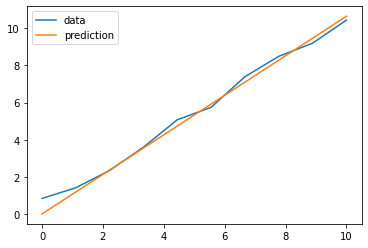

In [8]:
plt.plot(X, Y, label = 'data')
plt.plot(X, w*X, label = 'prediction')
plt.legend()
plt.show

seaborn 활용 연습

In [9]:
import seaborn as sns
import pandas as pd

In [10]:
df1 = pd.Series(X)
df2 = pd.Series(Y)

In [11]:
df = pd.concat([df1, df2], axis = 1)
df.columns = ["X", "Y"]
df

,X,Y
0,0.000000,0.833119
1,1.111111,1.409986
2,2.222222,2.342217
3,3.333333,3.599210
4,4.444444,5.073258
5,5.555556,5.743277
6,6.666667,7.392310
7,7.777778,8.489106
8,8.888889,9.197827
9,10.000000,10.440266


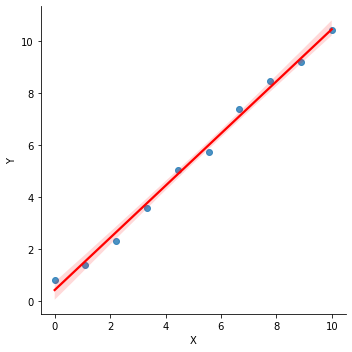

In [12]:
sns.lmplot(x = "X", y = "Y", data = df, line_kws={"color":"red"})